<a href="https://colab.research.google.com/github/arko-14/HYDROPREDICT/blob/main/Analysis_groundwater.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/groundwater2.csv', encoding='latin1')

In [ ]:
print(df.head())

   Year Month      State   District Water Level
0  2020   Jan  Karnataka  Bangalore       15.00
1  2020   Feb  Karnataka  Bangalore       14.80
2  2020   Mar  Karnataka  Bangalore       14.60
3  2020   Apr  Karnataka  Bangalore       14.40
4  2020   May  Karnataka  Bangalore       14.20


In [ ]:
df_cleaned = df.dropna()

In [ ]:
print(df_cleaned.columns)

Index(['Year', 'Month', 'State', 'District', 'Water Level'], dtype='object')


In [ ]:
print(df.head())
print(df.info())
print(df.isnull().sum())

   Year Month      State   District Water Level
0  2020   Jan  Karnataka  Bangalore       15.00
1  2020   Feb  Karnataka  Bangalore       14.80
2  2020   Mar  Karnataka  Bangalore       14.60
3  2020   Apr  Karnataka  Bangalore       14.40
4  2020   May  Karnataka  Bangalore       14.20
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         161 non-null    object
 1   Month        161 non-null    object
 2   State        161 non-null    object
 3   District     161 non-null    object
 4   Water Level  161 non-null    object
dtypes: object(5)
memory usage: 6.4+ KB
None
Year           0
Month          0
State          0
District       0
Water Level    0
dtype: int64


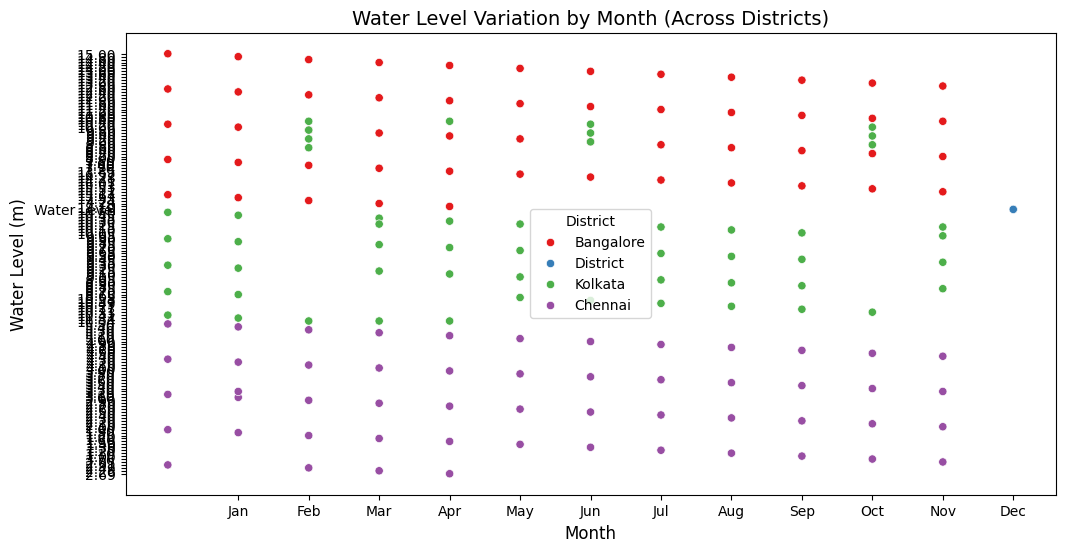

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plot
plt.figure(figsize=(12, 6))

# Creating scatter plot with different colors for each district
sns.scatterplot(x='Month', y='Water Level', hue='District', data=df, palette='Set1')

# Adding labels and title
plt.title('Water Level Variation by Month (Across Districts)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Water Level (m)', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


plt.legend(title='District')

plt.show()

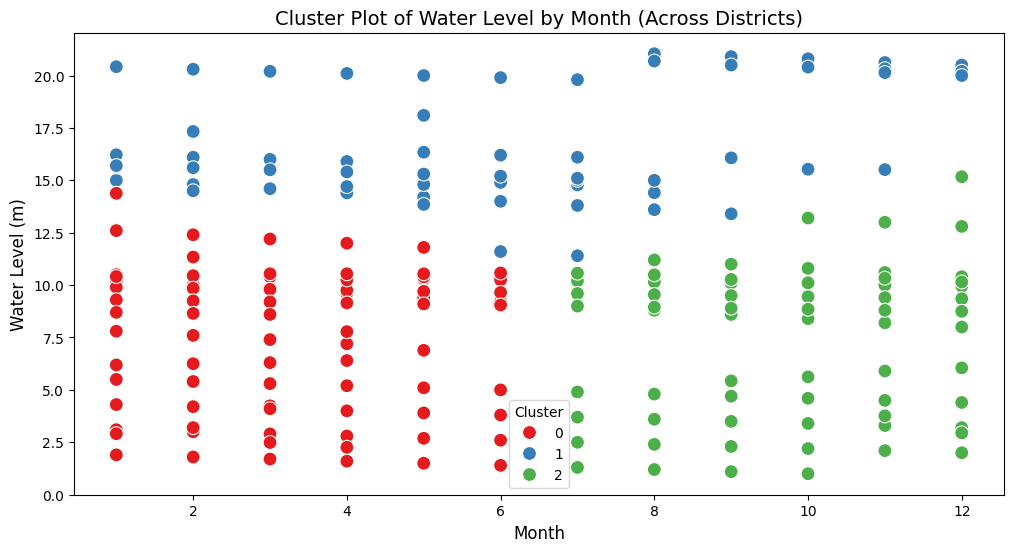

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('/content/drive/MyDrive/groundwater2.csv', encoding='latin1')

# Converting 'Month' to numerical values
month_dict = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
              'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df['Month'] = df['Month'].map(month_dict)


df = df.dropna()


features = df[['Water Level', 'Month']]
# Scaling the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Applying KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Creating the cluster plot
plt.figure(figsize=(12, 6))

# Creating scatter plot with clusters
sns.scatterplot(x='Month', y='Water Level', hue='Cluster', data=df, palette='Set1', s=100)

# Adding labels and title
plt.title('Cluster Plot of Water Level by Month (Across Districts)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Water Level (m)', fontsize=12)


plt.legend(title='Cluster')
plt.show()


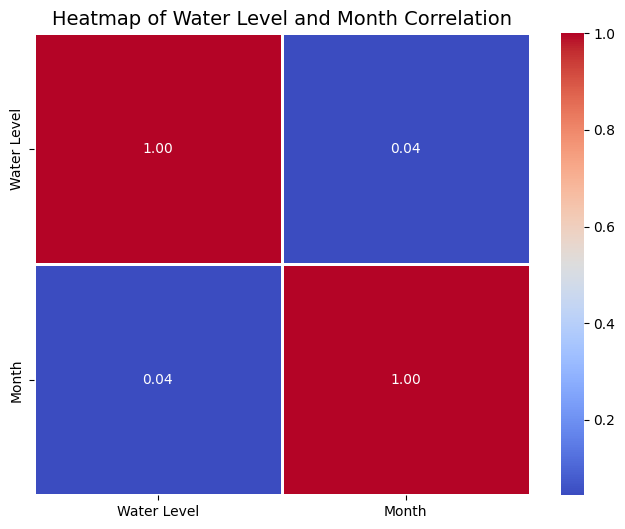

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load your dataset (assuming it's named 'df')
df = pd.read_csv('/content/drive/MyDrive/groundwater2.csv', encoding='latin1')

# Converting 'Month' to numeric values (if not already numeric)
month_dict = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
              'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df['Month'] = df['Month'].map(month_dict)


df = df.dropna()

# Selecting relevant numerical columns for the correlation
features = df[['Water Level', 'Month']]

# Calculating correlation matrix
correlation_matrix = features.corr()

# Creating heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, cbar=True)

# Adding title and labels
plt.title('Heatmap of Water Level and Month Correlation', fontsize=14)
plt.show()

In [ ]:
import pandas as pd


df = pd.read_csv('/content/drive/MyDrive/groundwater2.csv', encoding='latin1')

# Converting 'Month' to numeric values
month_dict = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
              'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df['Month'] = df['Month'].map(month_dict)

# Adding a new column 'Season' based on the month
def get_season(month):
    if month in [1, 2]:  # Jan, Feb
        return 'Winter'
    elif month in [3, 4, 5]:  # Mar, Apr, May
        return 'Pre-monsoon'
    elif month in [6, 7, 8, 9]:  # Jun, Jul, Aug, Sep
        return 'Southwest Monsoon'
    else:  # Oct, Nov, Dec
        return 'Post-monsoon'

# Applying the function to the 'Month' column to create the 'Season' column
df['Season'] = df['Month'].apply(get_season)


print(df)

# Save the updated DataFrame to a new CSV file
df.to_csv("/content/drive/MyDrive/newGlevel.csv", index=False)


       Year  Month      State   District  Water Level       Season
0    2020.0    1.0  Karnataka  Bangalore        15.00       Winter
1    2020.0    2.0  Karnataka  Bangalore        14.80       Winter
2    2020.0    3.0  Karnataka  Bangalore        14.60  Pre-monsoon
3    2020.0    4.0  Karnataka  Bangalore        14.40  Pre-monsoon
4    2020.0    5.0  Karnataka  Bangalore        14.20  Pre-monsoon
..      ...    ...        ...        ...          ...          ...
210  2024.0    1.0      Delhi      Delhi         6.19       Winter
211  2024.0    2.0      Delhi      Delhi         6.25       Winter
212  2024.0    3.0      Delhi      Delhi         6.30  Pre-monsoon
213  2024.0    4.0      Delhi      Delhi         6.40  Pre-monsoon
214  2024.0    5.0      Delhi      Delhi         6.89  Pre-monsoon

[215 rows x 6 columns]
